In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
path = './TCIA_old/LUNG1-004/CT/000066.dcm'

In [4]:
dcm = pydicom.dcmread(path)

(array([1.53131e+05, 1.62300e+04, 1.79150e+04, 1.38550e+04, 5.91700e+03,
        2.60000e+03, 1.50800e+03, 1.00900e+03, 8.28000e+02, 7.02000e+02,
        6.47000e+02, 6.21000e+02, 6.19000e+02, 5.64000e+02, 5.57000e+02,
        5.18000e+02, 5.50000e+02, 4.65000e+02, 4.83000e+02, 4.35000e+02,
        4.26000e+02, 1.88900e+03, 7.39000e+03, 4.96900e+03, 5.00400e+03,
        1.05870e+04, 7.95700e+03, 1.47000e+03, 9.11000e+02, 5.61000e+02,
        4.14000e+02, 3.22000e+02, 2.09000e+02, 1.73000e+02, 1.45000e+02,
        1.13000e+02, 9.80000e+01, 6.90000e+01, 6.00000e+01, 3.50000e+01,
        3.70000e+01, 3.60000e+01, 2.90000e+01, 2.60000e+01, 1.20000e+01,
        1.30000e+01, 1.20000e+01, 9.00000e+00, 4.00000e+00, 4.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

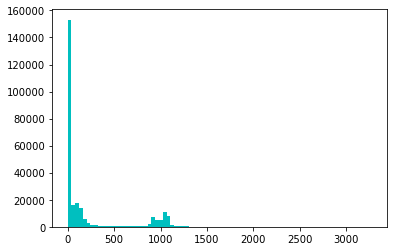

In [6]:
plt.hist(dcm.pixel_array.flatten(),bins=80,color='c')

In [9]:
#convert to HU
pix_arr=dcm.pixel_array
pix_arr=pix_arr.astype(np.int16)
pix_arr[pix_arr==-2000]=0
intercept=dcm.RescaleIntercept
slop=dcm.RescaleSlope
pix_arr+=np.int16(intercept)

In [10]:
pix_arr

array([[-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       ...,
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024],
       [-1024, -1024, -1024, ..., -1024, -1024, -1024]], dtype=int16)

(array([1.53131e+05, 1.62300e+04, 1.79150e+04, 1.38550e+04, 5.91700e+03,
        2.60000e+03, 1.50800e+03, 1.00900e+03, 8.28000e+02, 7.02000e+02,
        6.47000e+02, 6.21000e+02, 6.19000e+02, 5.64000e+02, 5.57000e+02,
        5.18000e+02, 5.50000e+02, 4.65000e+02, 4.83000e+02, 4.35000e+02,
        4.26000e+02, 1.88900e+03, 7.39000e+03, 4.96900e+03, 5.00400e+03,
        1.05870e+04, 7.95700e+03, 1.47000e+03, 9.11000e+02, 5.61000e+02,
        4.14000e+02, 3.22000e+02, 2.09000e+02, 1.73000e+02, 1.45000e+02,
        1.13000e+02, 9.80000e+01, 6.90000e+01, 6.00000e+01, 3.50000e+01,
        3.70000e+01, 3.60000e+01, 2.90000e+01, 2.60000e+01, 1.20000e+01,
        1.30000e+01, 1.20000e+01, 9.00000e+00, 4.00000e+00, 4.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

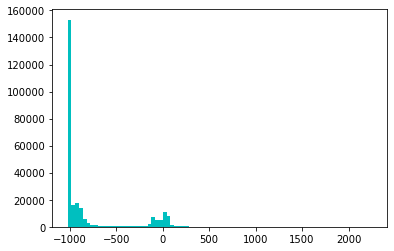

In [11]:
plt.hist(pix_arr.flatten(),bins=80,color='c')

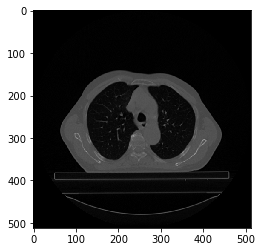

In [13]:
plt.imshow(pix_arr,cmap=plt.cm.gray)

In [14]:
binary_image=np.array(pix_arr>-320,dtype=np.int8)+1

In [15]:
labels=measure.label(binary_image)

In [16]:
background_label=labels[0,0]

In [17]:
binary_image[background_label == labels] = 2

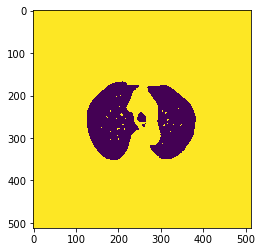

In [19]:
plt.imshow(binary_image)

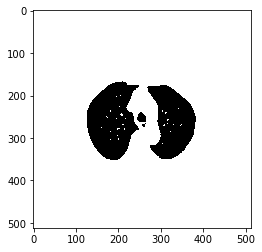

In [20]:
plt.imshow(binary_image,cmap='gray')

In [21]:
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)

    counts = counts[vals != bg]
    vals = vals[vals != bg]

    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None

In [22]:
axial_slice=binary_image-1
labeling=measure.label(axial_slice)
l_max=largest_label_volume(labeling,bg=0)
if l_max is not None:
    binary_image[labeling != l_max]=1

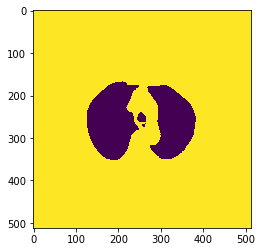

In [23]:
plt.imshow(binary_image)

In [24]:
binary_image -= 1
binary_image = 1-binary_image

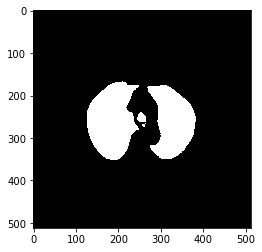

In [25]:
plt.imshow(binary_image,cmap='gray')

In [26]:
binary_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)